# Downloading, Filtering, Processing and Analysing Google Ngrams Fr-2012 for High Degree Prefixes Analaysis



# A. Downloading / filtering google ngrams files

to download google ngrams data, we provide two shell scripts :
- `retrieve_googlengrams.fr.2012.sh` : this program download all necessary files with curl; files are stored in the `../data_ngram/googlengrams.fr.2012` subdirectory and then generate for each file a csv file (`<name_of_gz_file>.gz.cleaned.csv`) containing just the lines beginning with one of the prefix, containing concerned year and no POS tag (with _);
- `retrieve_googlengrams.fr.2020.sh`: the same with Google Ngrams version 2020 (stored in `../data_ngram/googlengrams.fr.2020`); as this version is not yet documented, we do not use it at the moment;

# B. Filter and generate merged 1-,2- and 3-grams files : 

- normalize strings : lowercase(), and convert `\s+--?\s+` to ' -'; 
- Check form of string (see regexp for query1gram, query2ram and query3gram) and drop string with integers;
- merge rows with same string values (after lowercase and normalization of `-`) : figures are the sum of respective values for given year;
- save skipped rows for each file for checking errors of parsing;
- merge all 1-grams, all 2-grams and all 3-grams data;
- save results in `../data/`: `fre.prefixes.1.grams.1799-2009.2012.csv`, `fre.prefixes.2.grams.1799-2009.2012.csv`,,`fre.prefixes.3.grams.1799-2009.2012.csv` 


In [79]:
import requests
import sys, csv,re, random, glob,os
import gzip
import pandas as pd


def read_google_ngram_to_df(filename, mindate=1799, daterange="1799-2009",query='.+'):
    ''' get google ngrams retrieved cleaned files and store into df
    format : ngram TAB year TAB match_count TAB volume_count NEWLINE
    '''
    data_columns = ['string', 'year', 'total_count','total_doc']   
    df1= pd.read_csv(filename, names = data_columns, usecols=['string', 'year', 'total_count'], sep='\t', error_bad_lines=True)
    # convert string to lower
    df1['string'] = df1.string.str.lower()  
    # convert '\s+--?\s+' to ' - '
    df1['string'] = df1.string.str.replace('\s+--?\s+', ' - ', regex=True)
    print("Initial df : ",df1.shape)
    # keep track of skipped lines to check
    dfbk = df1[(~df1['string'].str.contains(query, case=False)) | (df1.string.str.contains('\d'))]
    dfbk.to_csv(filename + '.skippedLines.csv',index=False)
    # just keep lines with string corresponding to query and without digit and with year > 1799
    df2 = df1[(df1['string'].str.contains(query, case=False)) & (~df1.string.str.contains('\d')) & (df1.year > 1799)]
    print("After string regex check : ", df2.shape)
    
    # merge identical string-year rows
    df3 = df2.groupby(['string','year'])['total_count'].sum().reset_index()
    print("After merging strings : ", df3.shape)

    # pivot the data so as to have years as columns and string (ngram) as row index
    df4 = df3.pivot_table(values='total_count', index='string', columns='year', fill_value=0) # index='string', aggfunc='mean'
    return df4

# main 
prefixes = ('archi','extra','hyper','hypra','maxi','méga','super','ultra')
mindate = 1799
maxdate = 2009
query1gram =  '^(?:ultra|super|hyper|hypra|extra|méga|archi|maxi|supra)\w{3,}'
query2gram =  '^(?:ultra|super|hyper|hypra|extra|méga|archi|maxi|supra)\s\w{3,}'
query3gram =  '^(?:ultra|super|hyper|hypra|extra|méga|archi|maxi|supra)\s+--?\s+\w{3,}'
query_type='prefixes'
lang='fre'
str_range = str(mindate) + "-" + str(maxdate)
input_path = '../data_ngrams/googlengrams.fr.2012/'
output_path = '../data/'

# read google ngrams files downloaded beforehand and merge them
# 1-grams
files1 = glob.glob(input_path + 'googlebooks-fre-all-1gram*.cleaned.csv')
res = []
for f in files1:
    print("parsing " +  f )
    df = read_google_ngram_to_df(f,mindate=1799,daterange=str_range, query=query1gram)
    res.append(df)
# merge dataframes
df1 = pd.concat(res)
print("Final df : ",df1.shape)
df1.to_csv( output_path + 'fre.prefixes.1.grams.' + str_range + ".2012.csv")
print("***"*20)

# 2-grams
files2 = glob.glob(input_path + 'googlebooks-fre-all-2gram*.cleaned.csv')
res = []
for f in files2:
    print("parsing " +f )
    df = read_google_ngram_to_df(f,mindate=1799,daterange=str_range, query=query2gram)
    res.append(df)
# merge dataframes
df1 = pd.concat(res)
print("Final df : ",df1.shape)
df1.to_csv( output_path + 'fre.prefixes.2.grams.' + str_range + ".2012.csv")
print("***"*20)

# 3-grams
files3 = glob.glob(input_path + 'googlebooks-fre-all-3gram*.cleaned.csv')
res = []
for f in files3:
    print("parsing " + f )
    df = read_google_ngram_to_df(f,mindate=1799,daterange=str_range, query=query3gram)
    res.append(df)
# merge dataframes
df1 = pd.concat(res)
print("Final df : ",df1.shape)
df1.to_csv( output_path + 'fre.prefixes.3.grams.' + str_range + ".2012.csv")


parsing ../data_ngrams/googlengrams.fr.2012/googlebooks-fre-all-1gram-20120701-a.gz.cleaned.csv
Initial df :  (111452, 3)
After string regex check :  (96252, 3)
After merging strings :  (72603, 3)
parsing ../data_ngrams/googlengrams.fr.2012/googlebooks-fre-all-1gram-20120701-e.gz.cleaned.csv
Initial df :  (113784, 3)
After string regex check :  (101032, 3)
After merging strings :  (86704, 3)
parsing ../data_ngrams/googlengrams.fr.2012/googlebooks-fre-all-1gram-20120701-h.gz.cleaned.csv
Initial df :  (107102, 3)
After string regex check :  (104973, 3)
After merging strings :  (91681, 3)
parsing ../data_ngrams/googlengrams.fr.2012/googlebooks-fre-all-1gram-20120701-m.gz.cleaned.csv
Initial df :  (69027, 3)
After string regex check :  (57818, 3)
After merging strings :  (46807, 3)
parsing ../data_ngrams/googlengrams.fr.2012/googlebooks-fre-all-1gram-20120701-s.gz.cleaned.csv
Initial df :  (141631, 3)
After string regex check :  (128637, 3)
After merging strings :  (106300, 3)
parsing ../d

# C. Filter with stoplists

In [80]:
# load stopwords
import re
stoplist={}
stoplist_loc={}
stoplist_all={}
files = glob.glob("../data/stoplists/*.txt")
for file in files:
    with open(file, mode="r",encoding="utf8") as f:
        if re.search(r'stoplist_latinloc', file):
            for line in f:
                if len(line.strip())>0:
                    # tranformation stoplist sans pos-tags
                    line2 = re.sub(r'_[A-Z]+','',line.strip())
                    stoplist_loc[line2]=1
                    stoplist_all[line2]=1
                    
        else:
            for line in f:
                if len(line.strip())>0:
                    # tranformation stoplist sans pos-tags
                    line2 = re.sub(r'_[A-Z]+','',line.strip())
                    stoplist[line2]=1
                    stoplist_all[line2]=1

stop_len = len(stoplist)
stop2_len = len(stoplist_loc)
stop3_len = len(stoplist_all)


stoplist1gram = [w for w in stoplist_all.keys() if not(re.search(r" ", w))]
stoplist2gram = [w for w in stoplist_all.keys() if re.search(r"^[^ ]+ [^ ]+$", w)]
stoplist3gram = [w for w in stoplist_all.keys() if re.search(r"-", w)]

print("Stoplist chargée : " + str(stop_len) + " mots.")
print("Stoplist Loc chargée : " + str(stop2_len) + " mots.")
print("Stoplist complète chargée : " + str(stop3_len) + " mots.")
print("Stoplist 1gram chargée : " + str(len(stoplist1gram)) + " mots.")
print("Stoplist 2gram chargée : " + str(len(stoplist2gram)) + " mots.")
print("Stoplist 3gram chargée : " + str(len(stoplist3gram)) + " mots.")

# sauvegarde des données complètes
fout = open("../data/stoplists/all_stopwords.csv", mode="w", encoding="utf-8")
fout.write("\n".join(stoplist.keys()))
fout.write("\n".join(stoplist_loc.keys()))
fout.close()


Stoplist chargée : 4080 mots.
Stoplist Loc chargée : 665 mots.
Stoplist complète chargée : 4591 mots.
Stoplist 1gram chargée : 3316 mots.
Stoplist 2gram chargée : 1246 mots.
Stoplist 3gram chargée : 29 mots.


# Traitement des 1-grams

In [81]:

if os.path.isfile('../data/fre.prefixes.1.grams.1799-2009.2012.csv'):
    print("Loading the 1 gram big file (no pos)...")
    df= pd.read_csv('../data/fre.prefixes.1.grams.1799-2009.2012.csv', header=0, sep=',', error_bad_lines=True)#, index_col=0 
else:
    print("Please generate fre.prefixes.1.grams.1799-2009.2012.csv with previous cells")
    exit()
print(df.info())
# élimination stoplist
df = df[~df.string.isin(stoplist)] # elimination mots dans les stoplists
print(df.info())
# generate prefix, word and sep columns 
pref_re = '^(ultra|super|hyper|hypra|extra|méga|archi|maxi|supra)(?:.*)$'
pref_re2 = '^(?:ultra|super|hyper|hypra|extra|méga|archi|maxi|supra)(.*)$'
df['prefix'] = df.string.str.extract(pref_re, expand=True)
df['word'] = df.string.str.extract(pref_re2, expand=True)
df['sep'] = 'FUSION'
print(df.info())
#print(df.head())
print(df.info())
print(df.prefix.value_counts())

Loading the 1 gram big file (no pos)...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Columns: 211 entries, string to 2009
dtypes: int64(210), object(1)
memory usage: 10.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 0 to 6699
Columns: 211 entries, string to 2009
dtypes: int64(210), object(1)
memory usage: 6.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 0 to 6699
Columns: 214 entries, string to sep
dtypes: int64(210), object(4)
memory usage: 6.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 0 to 6699
Columns: 214 entries, string to sep
dtypes: int64(210), object(4)
memory usage: 6.4+ MB
None
hyper    1358
extra     709
super     647
archi     495
ultra     326
méga      195
maxi      152
Name: prefix, dtype: int64


In [82]:
columns = df.columns
periods = [elt for elt in columns if re.match("[0-9]{4}", elt)]
df['full_count'] = df.apply(lambda x: x[periods].sum(), axis=1)
df.head()
df.to_csv("./tmp/df_prefixes_1grams.2012.csv")

# 2-grams processing

In [83]:

if os.path.isfile('../data/fre.prefixes.2.grams.1799-2009.2012.csv'):
    print("Loading the 2 gram big file (no pos)...")
    df2= pd.read_csv('../data/fre.prefixes.2.grams.1799-2009.2012.csv', header=0, sep=',', error_bad_lines=False)#, index_col=0 
else:
    print("Please first launch retrieve_google_2grams.py to generate fre.prefixes.2.grams.1799-2009.2012.csv")
    exit()

print(df2.info())

# élimination stoplist
df2 = df2[~df2.string.isin(stoplist)]
df2.info()
df2.head()

# colonnes préfix et word
pref_re = '^(ultra|super|hyper|hypra|extra|méga|archi|maxi|supra)\s+(?:\w{3,})$'
pref_re2 = '^(?:ultra|super|hyper|hypra|extra|méga|archi|maxi|supra)\s+(\w{3,})$'
df2['prefix'] = df2.string.str.extract(pref_re, expand=True)
df2['word'] = df2.string.str.extract(pref_re2, expand=True)
df2['sep'] = 'ESPACE'
print(df2.info())
print(df2.prefix.value_counts())


Loading the 2 gram big file (no pos)...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Columns: 211 entries, string to 2009
dtypes: float64(174), int64(36), object(1)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1478 entries, 0 to 2008
Columns: 211 entries, string to 2009
dtypes: float64(174), int64(36), object(1)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1478 entries, 0 to 2008
Columns: 214 entries, string to sep
dtypes: float64(174), int64(36), object(4)
memory usage: 2.4+ MB
None
super    693
extra    398
ultra    275
hyper     70
maxi      20
archi     18
méga       4
Name: prefix, dtype: int64


In [84]:
columns = df2.columns
periods = [elt for elt in columns if re.match("[0-9]{4}", elt)]
df2['full_count'] = df2.apply(lambda x: x[periods].sum(), axis=1)
df2.head()
df2.to_csv("./tmp/df_prefixes_2grams.2012.csv")

# 3-grams processing

In [85]:

if os.path.isfile('../data/fre.prefixes.3.grams.1799-2009.2012.csv'):
    print("Loading the 3 gram big file (no pos)...")
    df3= pd.read_csv('../data/fre.prefixes.3.grams.1799-2009.2012.csv', header=0, sep=',', error_bad_lines=False)#, index_col=0 
else:
    print("Please first launch retrieve_google_3grams.py to generate fre.prefixes.3.grams.1799-2009.2012.csv")
    exit()
print(df3.info())
    
# élimination stoplist
df3 = df3[~df3.string.isin(stoplist)]
df3.info()

# colonnes préfix et word
pref_re = '^(ultra|super|hyper|hypra|extra|méga|archi|maxi|supra)\s+(?:--?)\s+(?:.*)$'
pref_re2 = '^(?:ultra|super|hyper|hypra|extra|méga|archi|maxi|supra)\s+(?:--?)\s+(.*)$'
df3['prefix'] = df3.string.str.extract(pref_re, expand=True)
df3['word'] = df3.string.str.extract(pref_re2, expand=True)
df3['sep'] = 'TIRET'
print(df3.info())
print(df3.prefix.value_counts())
#print(df3.head())

Loading the 3 gram big file (no pos)...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Columns: 211 entries, string to 2009
dtypes: float64(100), int64(110), object(1)
memory usage: 3.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2137
Columns: 211 entries, string to 2009
dtypes: float64(100), int64(110), object(1)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2137
Columns: 214 entries, string to sep
dtypes: float64(100), int64(110), object(4)
memory usage: 3.5+ MB
None
extra    832
ultra    545
super    396
hyper    184
archi    111
méga      27
maxi      15
Name: prefix, dtype: int64


In [86]:
columns = df3.columns
periods = [elt for elt in columns if re.match("[0-9]{4}", elt)]
df3['full_count'] = df3.apply(lambda x: x[periods].sum(), axis=1)
df3.head()
df3.to_csv("./tmp/df_prefixes_3grams.2012.csv")

# D. Generate Merged Dataframe

In [87]:
df4 = pd.concat([df,df2,df3],ignore_index=True)
print(df4.info())
print(df4.prefix.value_counts())
#print(df4.describe())
df4.to_csv("../data/df_googlengrams_all.2012.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Columns: 215 entries, string to full_count
dtypes: float64(175), int64(36), object(4)
memory usage: 12.3+ MB
None
extra    1939
super    1736
hyper    1612
ultra    1146
archi     624
méga      226
maxi      187
Name: prefix, dtype: int64


# E. Generate Dataframe with Relative Frequency

In [88]:
def load_total_counts(corpus_id, start_year, end_year):
    '''
    This function loads the total counts for a given corpus from Google's source data.
    '''
    # map from id to url
    id_to_url= {
    15: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-all-totalcounts-20120701.txt',
    17: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-us-all-totalcounts-20120701.txt',
    18: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-gb-all-totalcounts-20120701.txt',
    16: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-fiction-all-totalcounts-20120701.txt',
    23: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-chi-sim-all-totalcounts-20120701.txt',
    19: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-fre-all-totalcounts-20120701.txt',
    20: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-ger-all-totalcounts-20120701.txt',
    24: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-heb-all-totalcounts-20120701.txt',
    22: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-ita-all-totalcounts-20120701.txt',
    25: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-rus-all-totalcounts-20120701.txt',
    21: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-spa-all-totalcounts-20120701.txt'
    }
    hdr='Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:10.0) Gecko/20100101 Firefox/10.0'
    headers={'User-Agent':hdr}
    resp = requests.get(id_to_url[corpus_id],headers=headers)
    resp.raise_for_status()
    response = resp.text
    #print(response)
    #response = urllib2.urlopen(urllib2.Request(id_to_url[corpus_id]))
    #total_counts = []
    total_counts2 = {}
    data = response.split("\t")
    for row in data:
        #print (row)
        #continue
        # first and last rows are empty, so a try...except is needed
        try:
            year, word_count, _, _ = row.split(',')
            #print(start_year)
            #print(end_year)
            #print(year)
            if int(year) >= start_year and int(year) <= end_year:
                #print(year)
                #print(word_count)
                #total_counts.append(int(word_count))
                total_counts2[year]=int(word_count)
                #print(total_counts)
        except ValueError:
            pass
        
    return total_counts2

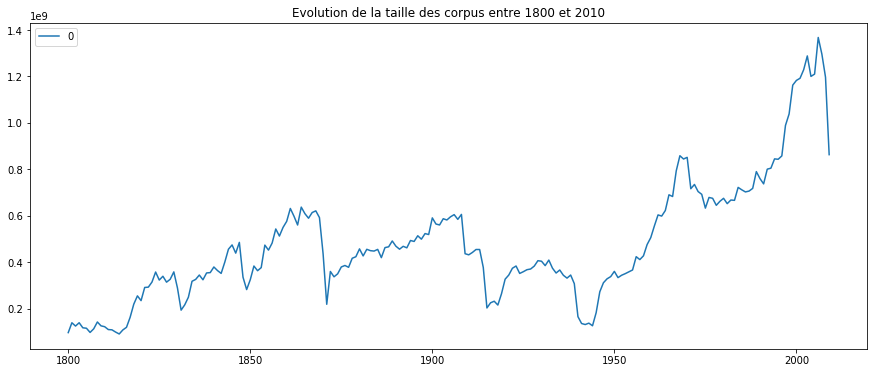

In [89]:


# load totals of tokens per corpus year
totals = load_total_counts(19,1800,2009)
pd.DataFrame.from_dict(totals, orient='index').plot(title="Evolution de la taille des corpus entre 1800 et 2010")
#pdf0.savefig()
#plt.close()


In [128]:
df = df4.copy(deep=True)

df_rel = df.copy(deep=True)
# load totals of tokens per corpus year
totals = load_total_counts(19,1800,2009)

# calculate relative frequency for each column

for i in range(1800,2010):
    df_rel[str(i) + '_freqrel'] = (df_rel[str(i)] / totals[str(i)]) * 100000

# remove absolute frequency for df (relative frequency used for clustering and plotting)
df_rel = df_rel.drop([str(i) for i in range(1800,2010)], axis=1)
df_rel.columns = df_rel.columns.str.replace('_freqrel', '')

print(df_rel.info())
df_rel.to_csv("../data/df_googlengrams_all_freqrel.2012.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Columns: 215 entries, string to 2009
dtypes: float64(211), object(4)
memory usage: 12.3+ MB
None


In [152]:
# without outliers

print(df_rel.info())

df_rel2 = df_rel[df_rel.full_count < df_rel.full_count.quantile(0.9)]
print(df_rel2.info())
df_rel2.to_csv("../data/df_googlengrams_all_freqrel.2012.no_outliers.csv", index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Columns: 215 entries, string to 2009
dtypes: float64(211), object(4)
memory usage: 12.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6723 entries, 0 to 7469
Columns: 215 entries, string to 2009
dtypes: float64(211), object(4)
memory usage: 11.1+ MB
None


In [99]:
# for visualization in néoveille
print(df_rel.columns)
periods = [elt for elt in columns if re.match("[0-9]{4}", elt)]
df5 =  df_rel.copy(deep=True)
df5tmp = df5[periods]
df5tmp2 = df5[['string','prefix','word','sep']]
#print(df5tmp.info())
#print(df5tmp2.info())

df6 = df5tmp.merge(df5tmp2, right_index = True, left_index = True)
#print(df6.head())
df7 = df6.melt(id_vars = ['string','prefix','word','sep'], value_name = "rel_freq").dropna()
df7.rename(index=str, columns={"variable": "year"}, inplace=True)
df7 = df7[df7.rel_freq > 0]
print(df7.info())
print(df7.head())
df7.to_csv("../data/df_googlengrams_neoveille.2012.csv", index=False)

Index(['string', 'prefix', 'word', 'sep', 'full_count', '1800', '1801', '1802',
       '1803', '1804',
       ...
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009'],
      dtype='object', length=215)
<class 'pandas.core.frame.DataFrame'>
Index: 399174 entries, 14 to 1568690
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   string    399174 non-null  object 
 1   prefix    399174 non-null  object 
 2   word      399174 non-null  object 
 3   sep       399174 non-null  object 
 4   year      399174 non-null  object 
 5   rel_freq  399174 non-null  float64
dtypes: float64(1), object(5)
memory usage: 21.3+ MB
None
             string prefix        word     sep  year  rel_freq
14        archibald  archi        bald  FUSION  1800  0.018548
43  archichancelier  archi  chancelier  FUSION  1800  0.001030
57      archicomble  archi      comble  FUSION  1800  0.002061
62   archiconfrérie 

In [153]:
# for visualization in néoveille (no outliers)
print(df_rel2.columns)
periods = [elt for elt in columns if re.match("[0-9]{4}", elt)]
df5 =  df_rel2.copy(deep=True)
df5tmp = df5[periods]
df5tmp2 = df5[['string','prefix','word','sep']]
#print(df5tmp.info())
#print(df5tmp2.info())

df6 = df5tmp.merge(df5tmp2, right_index = True, left_index = True)
#print(df6.head())
df7 = df6.melt(id_vars = ['string','prefix','word','sep'], value_name = "rel_freq").dropna()
df7.rename(index=str, columns={"variable": "year"}, inplace=True)
df7 = df7[df7.rel_freq > 0]
print(df7.info())
print(df7.head())
df7.to_csv("../data/df_googlengrams_neoveille.2012.no_outliers.csv", index=False)

Index(['string', 'prefix', 'word', 'sep', 'full_count', '1800', '1801', '1802',
       '1803', '1804',
       ...
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009'],
      dtype='object', length=215)
<class 'pandas.core.frame.DataFrame'>
Index: 310843 entries, 71 to 1411821
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   string    310843 non-null  object 
 1   prefix    310843 non-null  object 
 2   word      310843 non-null  object 
 3   sep       310843 non-null  object 
 4   year      310843 non-null  object 
 5   rel_freq  310843 non-null  float64
dtypes: float64(1), object(5)
memory usage: 16.6+ MB
None
               string prefix         word     sep  year  rel_freq
71          archidame  archi         dame  FUSION  1800  0.003091
76          archidice  archi         dice  FUSION  1800  0.001030
89         archiducal  archi        ducal  FUSION  1800  0.001030
106  arc

# F. Generate synthesis on data

In [91]:
import requests
import sys, csv,re, random, glob,os
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import matplotlib
import seaborn as sns                            # more plots
from sklearn.metrics import mean_absolute_error
from matplotlib.backends.backend_pdf import PdfPages

In [92]:
def plot_rolling_simple(df,title, window=10):
    fig, ax = plt.subplots(2,figsize=(20, 10))
    ax[0].plot(df.index, df.data, label='raw data')
    ax[0].plot(df.data.rolling(window=window).mean(),label="rolling mean (window=" + str(window) + ")")
    ax[0].plot(df.data.rolling(window=window).std(), label="rolling std (window=" + str(window) + ")")
    ax[0].legend()

    ax[1].plot(df.index, df.z_data, label="de-trended data")
    ax[1].plot(df.z_data.rolling(window=window).mean(), label="rolling mean (window=" + str(window) + ")")
    ax[1].plot(df.z_data.rolling(window=window).std(), label="rolling std (window=" + str(window) + ")")
    ax[1].legend()

    fig.suptitle(title, fontsize=13)
    plt.tight_layout()
    #fig.autofmt_xdate()
    
# useful for annotating barcharts
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


            
            
# save dataframe df
# save to excel
def save_report(df, key, outfile):
    """
    Take a report and save it to a single Excel file
    """
    cols = sorted(list(df.columns.values),reverse=True)
    #print(cols)
    writer = pd.ExcelWriter(outfile)
    #for k, grp in df[['prefix','word','full_count','string']].groupby(key):
    for pref in df.prefix.values:
        dfprint = df[df.prefix == pref].groupby(['word','string','sep'])['full_count'].sum().reset_index().sort_values('full_count', ascending=False).set_index(['word'])
        #print(dfprint)
        dfprint.to_excel(writer,pref)
        #grp.sort_values('full_count', ascending=False).set_index(['string','word','sep'])['full_count'].to_excel(writer,k)
    writer.save()
    return True


        count        sum  freq100      prod
prefix                                     
extra    1939  6803615.0    704.0  0.363074
super    1736  2001902.0    712.0  0.410138
hyper    1612  2151110.0    531.0  0.329404
ultra    1146   612385.0    523.0  0.456370
archi     624  1032080.0    251.0  0.402244
méga      226   205717.0     66.0  0.292035
maxi      187   122520.0     79.0  0.422460


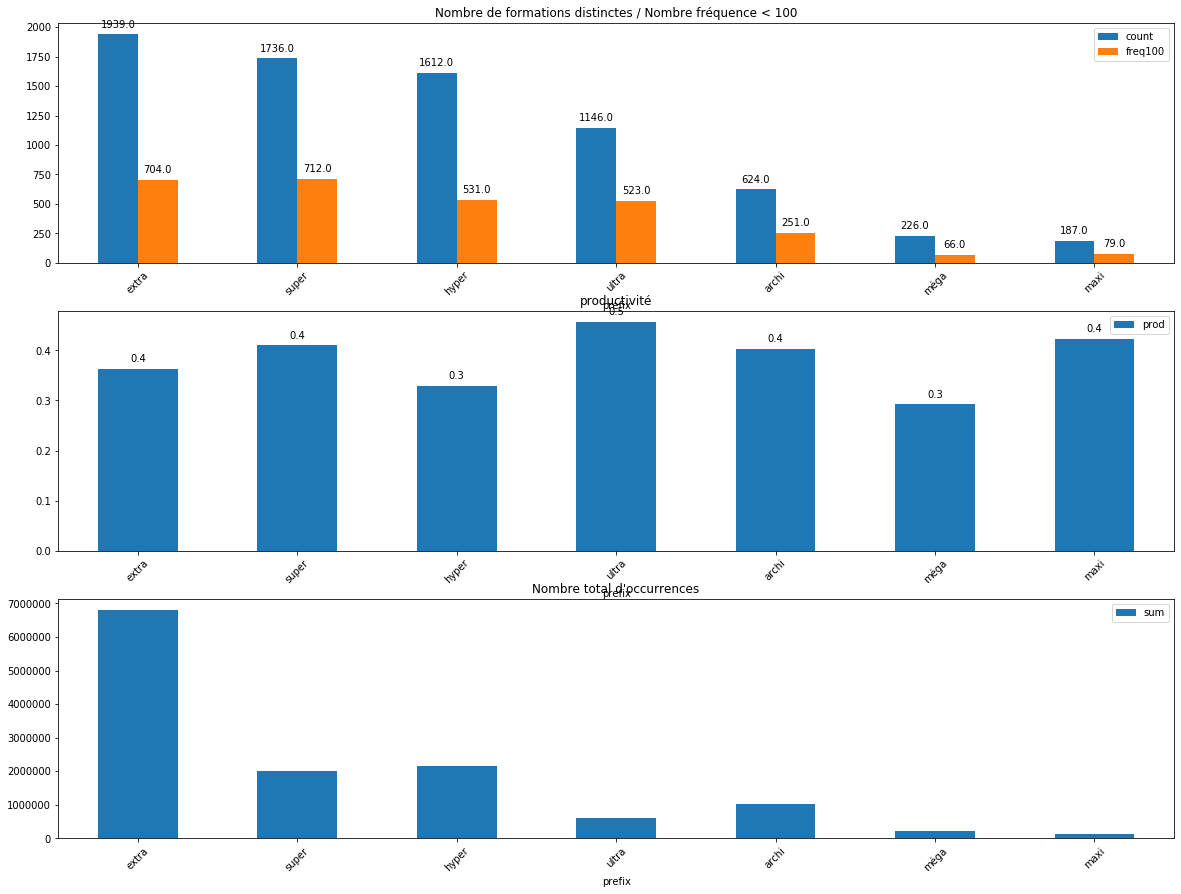

In [93]:
# calcul productivité
def freq100(x):
    #print(x)
    return len(x[x<100])
df2 = df.groupby(['prefix'])['full_count'].agg(['count','sum',freq100]).sort_values('count', ascending=False)

df2['prod'] = df2['freq100'] / df2['count']
print(df2)
fig, ax = plt.subplots(3, figsize=(20, 15))
df2[['count','freq100']].plot(kind="bar", ax=ax[0], rot=45, title="Nombre de formations distinctes / Nombre fréquence < 100",legend=True)
add_value_labels(ax[0])
df2[['prod']].plot(kind="bar",ax=ax[1], rot=45, title="productivité")

df2[['sum']].plot(kind="bar",ax=ax[2], rot=45, title="Nombre total d'occurrences")
add_value_labels(ax[1])


In [94]:
# base for browsing words
words = df.groupby('word')['full_count'].agg(['count','sum']).sort_values('sum', ascending=False)
print(words.head())
words20 = list(words.index.values)[0:20]
print(list(words.index.values)[0:20])

               count        sum
word                           
ordinaire          3  3800756.0
ordinaires         3  1654893.0
trophie            3   360982.0
position           5   352855.0
ordinairement      3   351409.0
['ordinaire', 'ordinaires', 'trophie', 'position', 'ordinairement', 'tension', 'structure', 'ficiellement', 'diacre', 'posent', 'duchesse', 'ducs', 'marchés', 'phosphate', 'tectonique', 'structures', 'marché', 'prêtre', 'plasie', 'chancelier']


        count        sum
prefix                  
extra    1939  6803615.0
super    1736  2001902.0
hyper    1612  2151110.0
ultra    1146   612385.0
archi     624  1032080.0
méga      226   205717.0
maxi      187   122520.0
['extra' 'super' 'hyper' 'ultra' 'archi' 'méga' 'maxi']
extra
word        abdominale  africaine  africaines  africains  agricole
1800-12-31    0.000000        0.0         0.0        0.0       0.0
1805-12-31    0.000849        0.0         0.0        0.0       0.0
1810-12-31    0.000000        0.0         0.0        0.0       0.0
1815-12-31    0.000000        0.0         0.0        0.0       0.0
1820-12-31    0.000911        0.0         0.0        0.0       0.0
word        abdominale  africaine  africaines  africains  agricole
1800-12-31         NaN        NaN         NaN        NaN       NaN
1805-12-31         1.0        0.0         0.0        0.0       0.0
1810-12-31        -1.0        0.0         0.0        0.0       0.0
1815-12-31         0.0        0.0         0

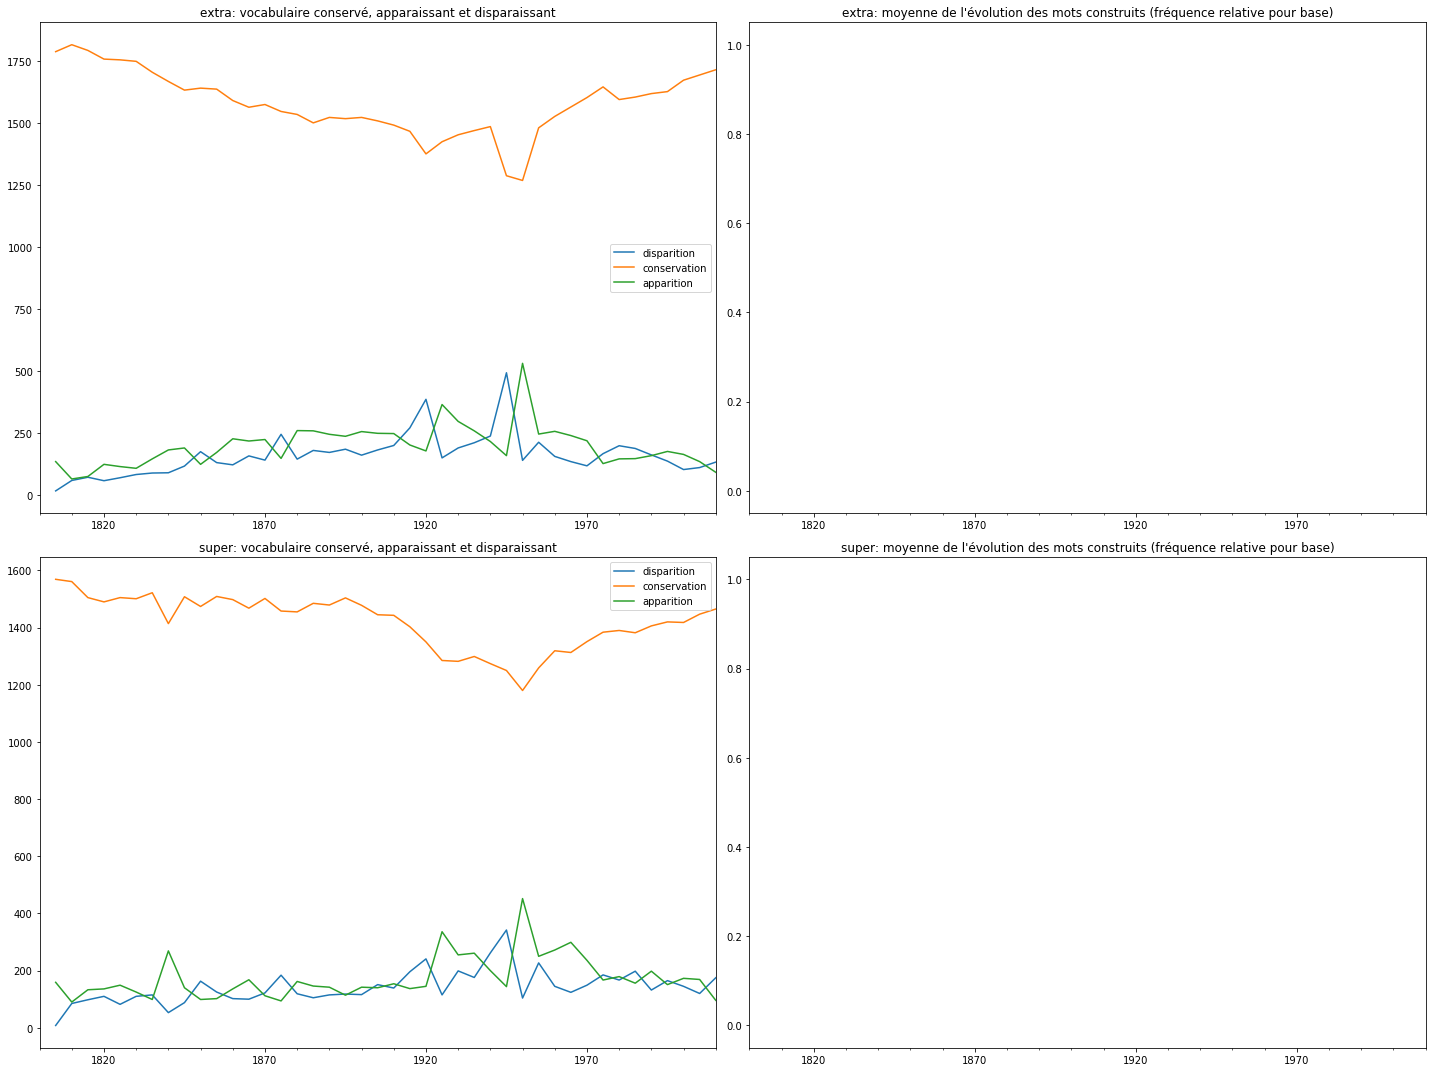

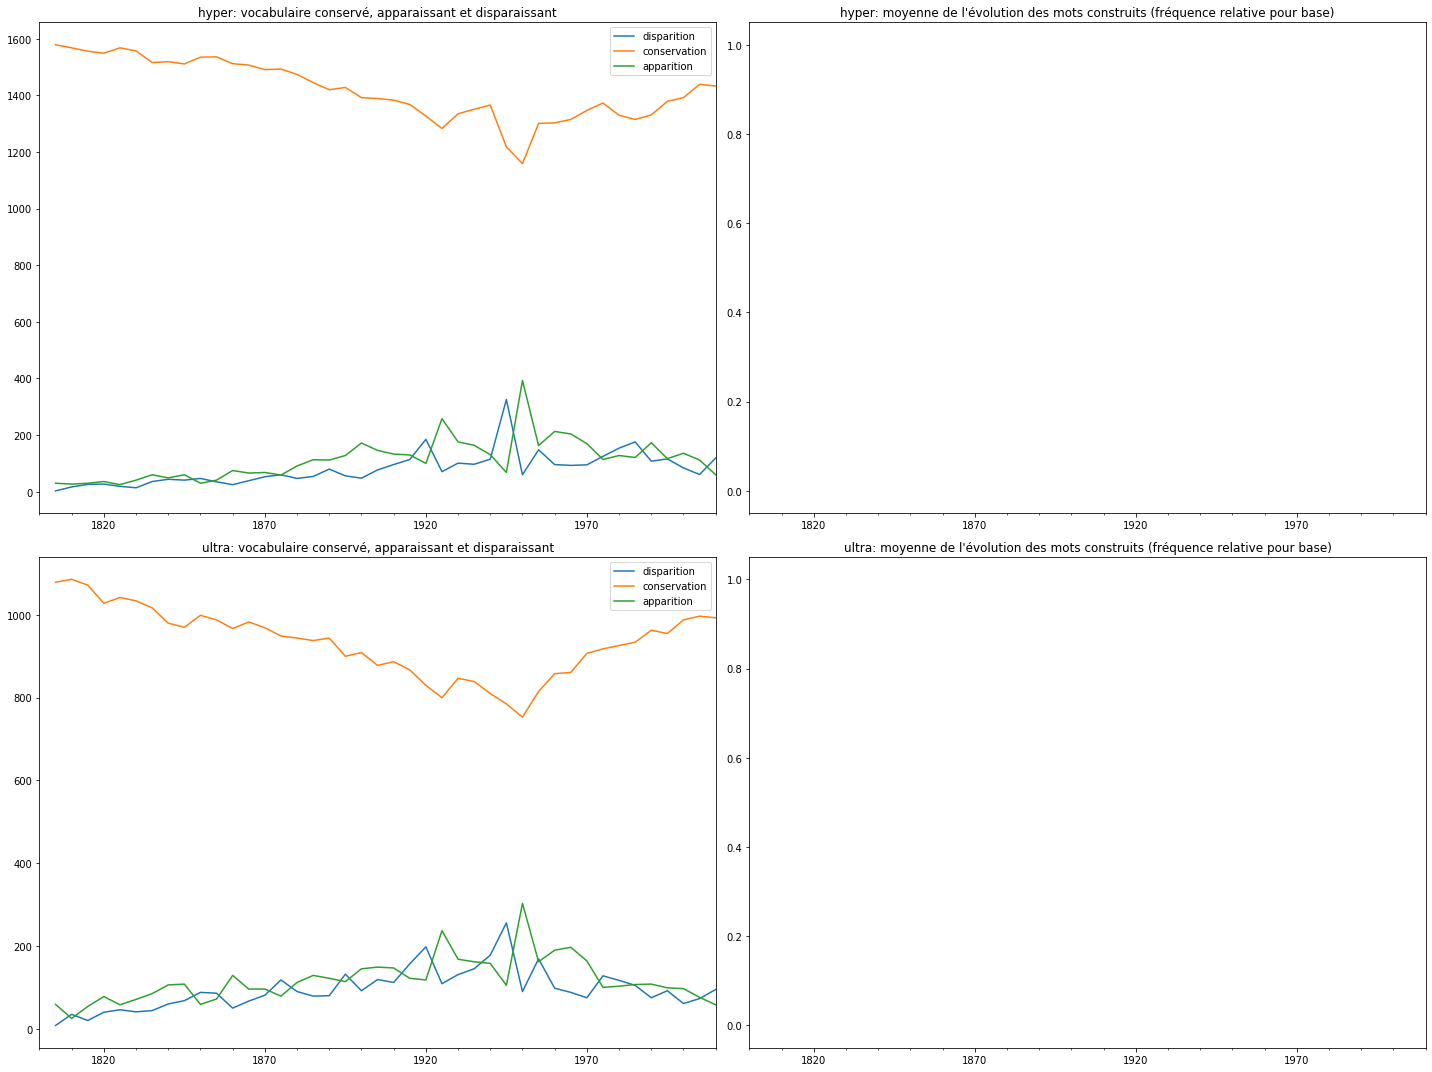

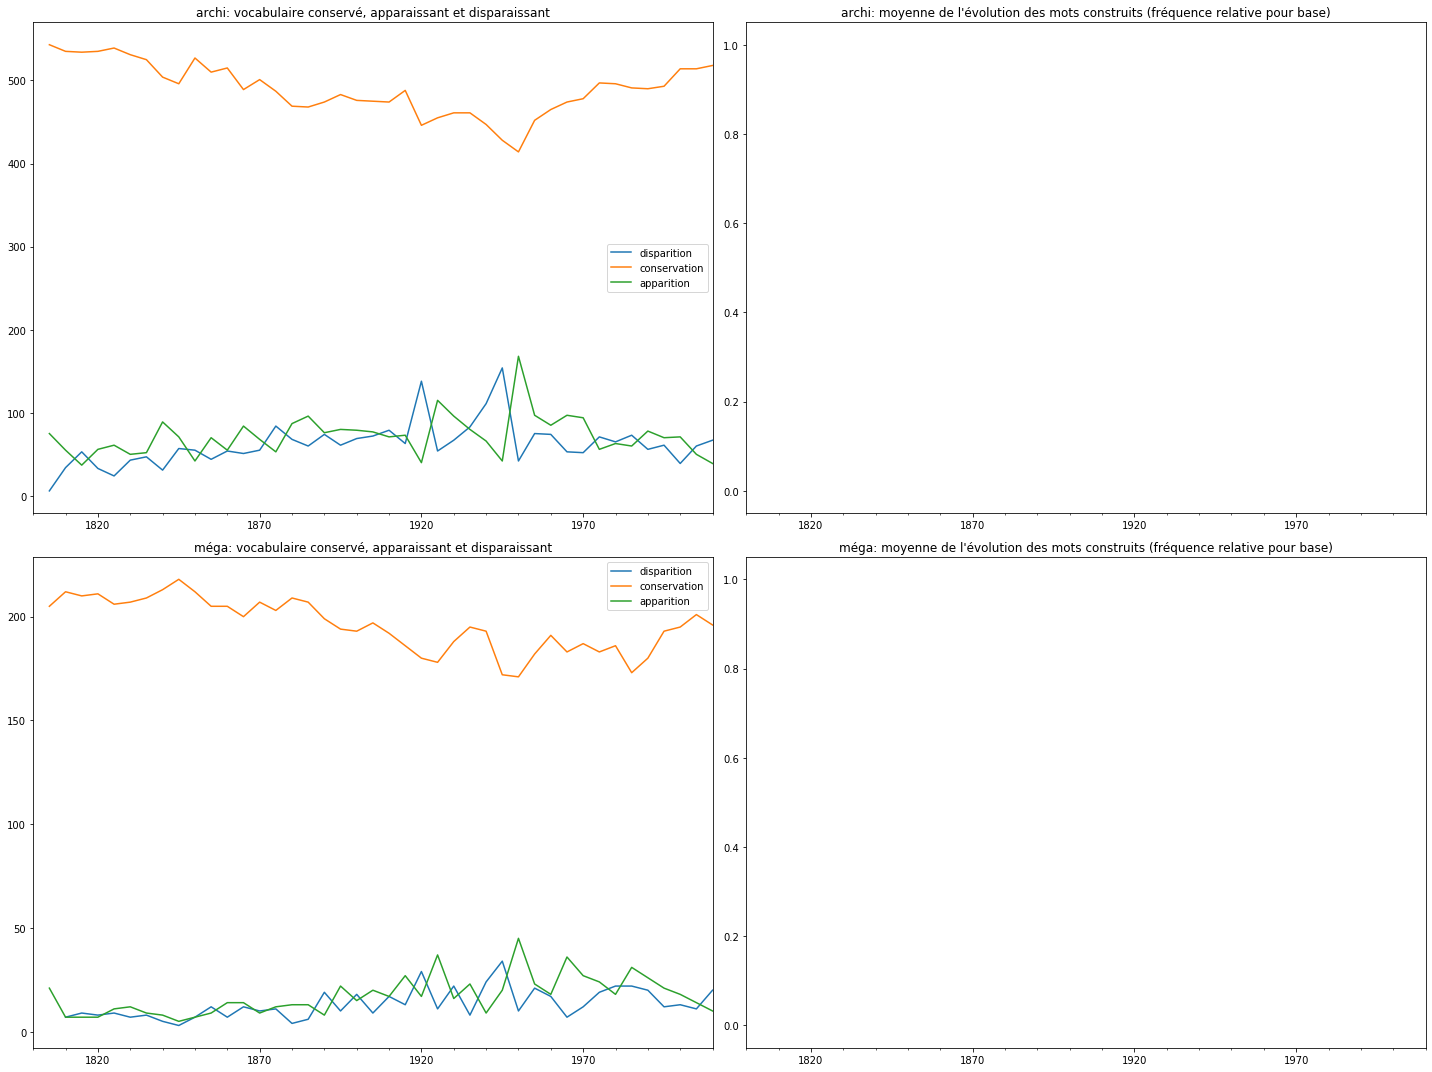

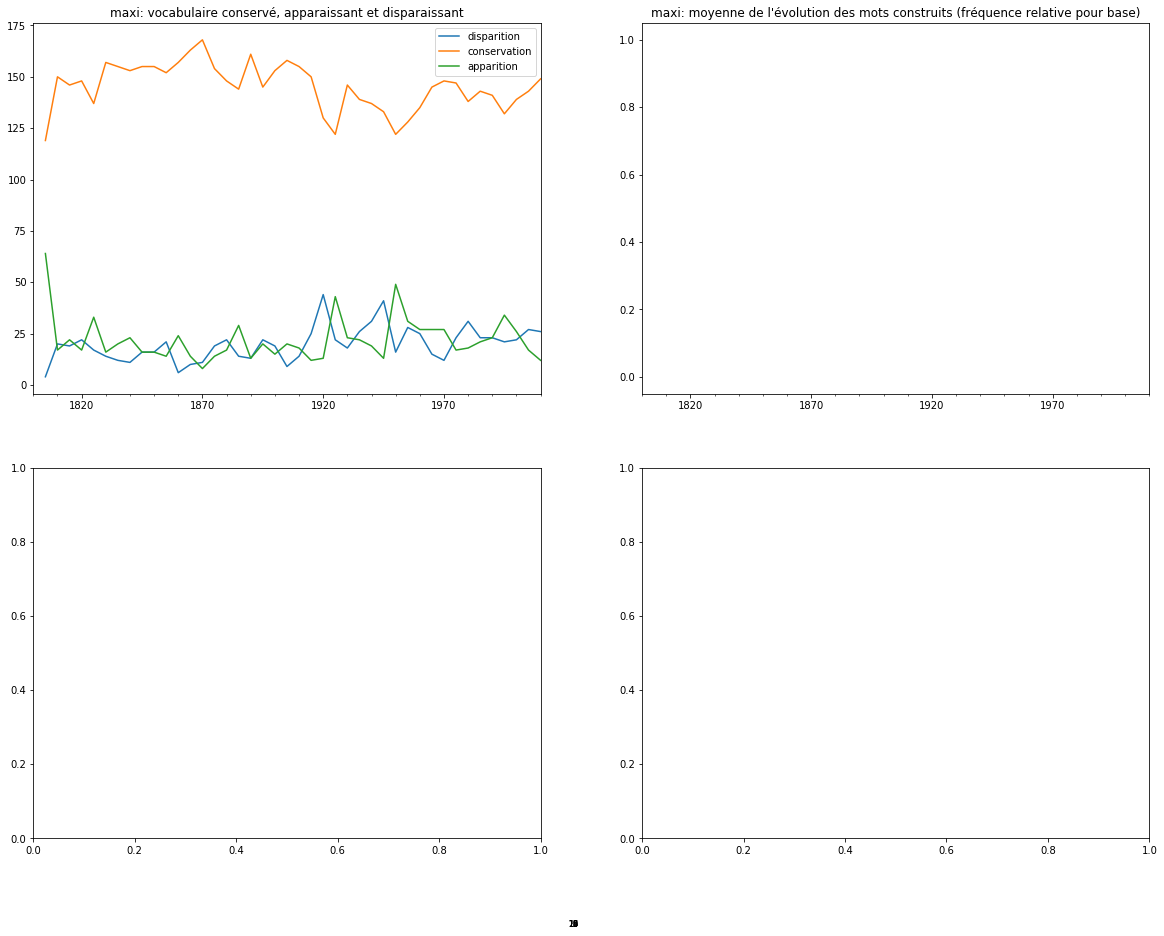

In [95]:
corpus = "googlengrams"
pdf2 = PdfPages('../visu/Prefix_all_noPOS_synthesis_' + corpus+ '.2012.pdf')

# base for browsing prefixes
dist1 = df.groupby('prefix')['full_count'].agg(['count','sum']).sort_values('count', ascending=False)
print(dist1)
print(dist1.index.values)

#columns = df.columns
#periods = [elt for elt in columns if re.match("[0-9]{4}-[0-9]{2}-[0-9]{2}", elt)]

# distribution entre les prefixes
fig, ax = plt.subplots(2, figsize=(20, 15))
df.groupby('prefix')['full_count'].count().plot(ax=ax[0],kind="bar",title='Distribution des fréquences entre préfixes (nbre de formations distinctes)', rot=45, figsize=(20,10))  # [['full_count']]
add_value_labels(ax[0])
df.groupby('prefix')['full_count'].sum().plot(ax=ax[1],kind="bar",title="Distribution des fréquences entre préfixes (nbre total d'occurrences)", rot=45, figsize=(20,10))  # [['full_count']]
add_value_labels(ax[1])
fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
fig.tight_layout()

pdf2.savefig()
plt.close()

# distribution entre les mots
fig, ax = plt.subplots(2, figsize=(20, 15))
#df.groupby('source')['full_count'].nlargest(20).count().plot(ax=ax[0],kind="bar",title='Distribution des fréquences entre sources (nbre de formations distinctes)', rot=45, figsize=(20,10))  # [['full_count']]
df[df.word.isin(words20)].groupby('word')['full_count'].count().plot(ax=ax[0],kind="bar",title='Distribution des fréquences entre mots (20) (nbre de formations distinctes)', rot=45, figsize=(20,10))  # [['full_count']]
add_value_labels(ax[0])
df[df.word.isin(words20)].groupby('word')['full_count'].sum().plot(ax=ax[1],kind="bar",title="Distribution des fréquences entre mots (20) (nbre total d'occurrences)", rot=45, figsize=(20,10))  # [['full_count']]
add_value_labels(ax[1])
fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
fig.tight_layout()

pdf2.savefig()
plt.close()

# distribution entre les séparateurs
fig, ax = plt.subplots(2, figsize=(20, 15))
df.groupby('sep')['full_count'].count().plot(ax=ax[0],kind="bar",title='Distribution des fréquences entre séparateurs  (nbre de formations distinctes)', rot=45, figsize=(20,10))  # [['full_count']]
add_value_labels(ax[0])
df.groupby('sep')['full_count'].sum().plot(ax=ax[1],kind="bar",title="Distribution des fréquences entre séparateurs  (nbre total d'occurrences)", rot=45, figsize=(20,10))  # [['full_count']]
add_value_labels(ax[1])
fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
fig.tight_layout()

pdf2.savefig()
plt.close()



   
# distribution plots
fig, ax = plt.subplots(8,3, figsize=(20, 15))
# get 0.9 quantile
i = 0
for pref in dist1.index.values:
        dfplot = df[df.prefix == pref]
        sns.distplot(dfplot['full_count'], ax=ax[i][0]).set_title('{} : {} formes distinctes, {} total occurrences (100%)'.format(pref, dist1.loc[pref,'count'], dist1.loc[pref,'sum']))
        # get 0.95 quantile
        q = dfplot["full_count"].quantile(0.9)
        dfplot2 = dfplot[dfplot["full_count"] < q]['full_count']      
        sns.distplot(dfplot2, ax=ax[i][1]).set_title(pref + ' : 90% quantiles')
        #sns.distplot(np.log(dfplot), ax=ax[0])
        sns.boxplot(dfplot2,ax=ax[i][2]).set_title(pref + ' : 90% quantiles')
        i=i+1
fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
fig.tight_layout()
pdf2.savefig()
plt.close()         

q = df["full_count"].quantile(0.9)
dfplot2 = df[df["full_count"] < q]      

sns.boxplot(x="prefix", y="full_count", data=dfplot2).set_title("Boîte à moustache des préfixes (fréquences absolues, 90% quantile)")
    # +  (TBD) kind= violin, box, boxen...
pdf2.savefig()
plt.close()


# evolution globale pour chaque préfixe
dfplot = df.groupby('prefix')[periods].sum().T
dfplot.index = pd.to_datetime(dfplot.index)
dfplot_rel = df_rel.groupby('prefix')[periods].sum().T
# freq absolue
fig, ax = plt.subplots(1, figsize=(20, 15))
dfplot.plot(ax=ax,kind="line", title="Evolution des distributions des préfixes (fréquence absolue, périodisation originelle)", rot=45, figsize=(20,10))  # [['full_count']]    
fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
pdf2.savefig()
plt.close()


# freq rel
fig, ax = plt.subplots(1, figsize=(20, 15))
dfplot_rel.plot(ax=ax,kind="line", title="Evolution des distributions des préfixes (fréquence relative)", rot=45, figsize=(20,10))  # [['full_count']]    
fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
pdf2.savefig()
plt.close()


# freq rel
fig, ax = plt.subplots(1, figsize=(20, 15))
dfplot_rel.ewm(span = 10).mean().plot(ax=ax,kind="line", title="Evolution des distributions des préfixes (fréquence relative), Lissage 10 ans", rot=45, figsize=(20,10))  # [['full_count']]    
fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
pdf2.savefig()
plt.close()



# evolution nbre de mots distincts
fig, ax = plt.subplots(1, figsize=(20, 15))
for k,grp in df_rel.groupby(['prefix']):
    grp[periods].astype(bool).sum(axis=0).T.plot(legend=True, ax=ax,kind="line", title="Evolution du nombre de formes différentes", rot=45, figsize=(20,10))  # [['full_count']]
fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
pdf2.savefig()
plt.close()


# evolution globale pour chaque mots
fig, ax = plt.subplots(1, figsize=(20, 15))
dfplot = df[df.word.isin(words20)].groupby('word')[periods].sum().T
dfplot.index = pd.to_datetime(dfplot.index)
dfplot_rel = df_rel[df_rel.word.isin(words20)].groupby('word')[periods].sum().T
dfplot4=dfplot.resample('5A').sum()
#dfplot.plot(legend=None, ax=ax[0],kind="line", title="Evolution des distributions des mots (fréquence absolue, périodisation originelle)", rot=45, figsize=(20,10))  # [['full_count']]    
#dfplot4.plot(legend=None, ax=ax[1],kind="line", title="Evolution des distributions des mots (fréquence absolue, période 5 ans)", rot=45, figsize=(20,10))  # [['full_count']]    
dfplot_rel.plot(ax=ax,kind="line", title="Evolution des distributions des mots (fréquence relative)", rot=45, figsize=(20,10))  # [['full_count']]    
fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
fig.tight_layout()
pdf2.savefig()
plt.close()


# evolution globale pour chaque séparateur
fig, ax = plt.subplots(1, figsize=(20, 15))
dfplot = df.groupby('sep')[periods].sum().T
dfplot.index = pd.to_datetime(dfplot.index)
dfplot_rel = df_rel.groupby('sep')[periods].sum().T
dfplot4=dfplot.resample('5A').sum()
#dfplot.plot(legend=None, ax=ax[0],kind="line", title="Evolution des distributions des séparateurs (fréquence absolue, périodisation originelle)", rot=45, figsize=(20,10))  # [['full_count']]    
#dfplot4.plot(legend=None, ax=ax[1],kind="line", title="Evolution des distributions des séparateurs (fréquence absolue, période 5 ans)", rot=45, figsize=(20,10))  # [['full_count']]    
dfplot_rel.plot(ax=ax,kind="line", title="Evolution des distributions des séparateurs (fréquence relative)", rot=45, figsize=(20,10))  # [['full_count']]    
fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
fig.tight_layout()
pdf2.savefig()
plt.close()




# get 0.9 quantile
i = 0
fig, ax = plt.subplots(2,2, figsize=(20, 15))
for pref in dist1.index.values:
    print(pref)
    dfplot3 = df_rel[df_rel.prefix == pref].set_index('word')[periods].T
    dfplot3.index = pd.to_datetime(dfplot3.index)
    dfplot4=dfplot3.resample('5y').sum()
    print(dfplot4.iloc[0:5,0:5])
    #print(np.log(dfplot4.iloc[0:5,0:5]))
    dfplotdiffres = (dfplot4/1000).apply(np.ceil).diff()
    print(dfplotdiffres.iloc[0:5,0:5])
    dfplotdiffres = dfplotdiffres.loc[:, (dfplotdiffres != 0).any(axis=0)]
    print(dfplotdiffres.iloc[0:5,0:5])
    dfdiffok = dfplotdiffres.apply(lambda x : x.value_counts(), axis=1)
    dfdiffok.rename(columns={-1.0:'disparition',
                          0.0:'conservation',
                          1.0:'apparition'}, 
                 inplace=True)
    print(dfdiffok.iloc[0:5,0:5])
    dfdiffok.plot(ax=ax[i][0], title=pref + ": vocabulaire conservé, apparaissant et disparaissant")

    dfplotdiffres['mean_diff'] = dfplot3.diff().apply(lambda x : x.mean(), axis=1)
    dfplotdiffres['mean_diff'].plot(ax=ax[i][1], title=pref + ": moyenne de l'évolution des mots construits (fréquence relative pour base)")

    if i==1:
        fig.tight_layout()
        pdf2.savefig()
        fig, ax = plt.subplots(2,2, figsize=(20, 15))
        i=0
    else:
        i=i+1
        
 




# moving average, trends etc.
df5 = df_rel.groupby('prefix').sum()[periods]
for pref in dist1.index.values : #df5.index.values:
    series = df5.loc[pref]
    #series.index = series.index.resample("W", how='sum')
    ts = pd.DataFrame({'data':series.values}, index=series.index) # 'year':seriesrel.index, 

    ts['z_data'] = (ts['data'] - ts.data.rolling(window=10).mean()) / ts.data.rolling(window=10).std()
    #ts['zp_data'] = ts['z_data'] - ts['z_data'].shift(10)
    plot_rolling_simple(ts,title= pref, window=10)
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    pdf2.savefig()
    plt.close()
pdf2.close()



In [96]:
### par préfixe

for pref in dist1.index.values:
    pdf2 = PdfPages('../visu/' + pref + '_all_noPOS_synthesis_' + corpus + '.2012.pdf')
    dfpref = df[df.prefix==pref]
    dfwpref = df_rel[df_rel.prefix==pref]
    dfpref_rel = df_rel[df_rel.prefix==pref]

    words = dfpref.groupby('word')['full_count'].agg(['count','sum']).sort_values('sum', ascending=False)
   # print(sources)
    words20pref = list(words.index.values)[0:20]
    #print(list(sources.index.values)[0:20])    

    
    # distribution 
    fig, ax = plt.subplots(2, figsize=(20, 15))
    dfpref.groupby('prefix')['full_count'].count().plot(ax=ax[0],kind="bar",title=pref + ' : distribution des fréquences (nbre de formations distinctes)', rot=45, figsize=(20,10))  # [['full_count']]
    add_value_labels(ax[0])
    dfpref.groupby('prefix')['full_count'].sum().plot(ax=ax[1],kind="bar",title=pref + " : distribution des fréquences (nbre total d'occurrences)", rot=45, figsize=(20,10))  # [['full_count']]
    add_value_labels(ax[1])
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    fig.tight_layout()

    pdf2.savefig()
    plt.close()

    
    
    # distribution entre les mots générés les plus fréquents d'informations
    fig, ax = plt.subplots(2, figsize=(20, 15))
    #df.groupby('source')['full_count'].nlargest(20).count().plot(ax=ax[0],kind="bar",title='Distribution des fréquences entre sources (nbre de formations distinctes)', rot=45, figsize=(20,10))  # [['full_count']]
    dfpref[df.word.isin(words20pref)].groupby('word')['full_count'].count().plot(ax=ax[0],kind="bar",title='Distribution des fréquences entre mots (20) (nbre de formations distinctes)', rot=45, figsize=(20,10))  # [['full_count']]
    add_value_labels(ax[0])
    dfpref[df.word.isin(words20pref)].groupby('word')['full_count'].sum().plot(ax=ax[1],kind="bar",title="Distribution des fréquences entre mots (20) (nbre total d'occurrences)", rot=45, figsize=(20,10))  # [['full_count']]
    add_value_labels(ax[1])
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    fig.tight_layout()
    
    pdf2.savefig()
    plt.close()
    
    # distribution entre les séparateurs de mots
    fig, ax = plt.subplots(2, figsize=(20, 15))
    #df.groupby('source')['full_count'].nlargest(20).count().plot(ax=ax[0],kind="bar",title='Distribution des fréquences entre sources (nbre de formations distinctes)', rot=45, figsize=(20,10))  # [['full_count']]
    dfpref.groupby('sep')['full_count'].count().plot(ax=ax[0],kind="bar",title='Distribution des fréquences entre séparateurs  (nbre de formations distinctes)', rot=45, figsize=(20,10))  # [['full_count']]
    add_value_labels(ax[0])
    dfpref.groupby('sep')['full_count'].sum().plot(ax=ax[1],kind="bar",title="Distribution des fréquences entre séparateurs  (nbre total d'occurrences)", rot=45, figsize=(20,10))  # [['full_count']]
    add_value_labels(ax[1])
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    fig.tight_layout()
    
    pdf2.savefig()
    plt.close()
  
    
    # distribution plots
    fig, ax = plt.subplots(3, figsize=(20, 15))
    dfplot = dfpref
    sns.distplot(dfplot['full_count'], ax=ax[0]).set_title('{} : {} formes distinctes, {} total occurrences (100%)'.format(pref, dist1.loc[pref,'count'], dist1.loc[pref,'sum']))
    # get 0.95 quantile
    q = dfplot["full_count"].quantile(0.9)
    dfplot2 = dfplot[dfplot["full_count"] < q]['full_count']      
    sns.distplot(dfplot2, ax=ax[1]).set_title(pref + ' : 90% quantiles')
    #sns.distplot(np.log(dfplot), ax=ax[0])
    sns.boxplot(dfplot2,ax=ax[2]).set_title(pref + ' : 90% quantiles')
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    fig.tight_layout()
    pdf2.savefig()
    plt.close()         
    
    
    
    # evolution globale pour chaque préfixe
    dfplot = dfpref[periods].sum().T
    dfplot.index = pd.to_datetime(dfplot.index)
    dfplot_rel = dfpref_rel[periods].sum().T
    # freq absolue
    fig, ax = plt.subplots(1, figsize=(20, 15))
    dfplot.plot(ax=ax,kind="line", title=pref + " : évolution des distributions des préfixes (fréquence absolue, périodisation originelle)", rot=45, figsize=(20,10))  # [['full_count']]    
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    pdf2.savefig()
    plt.close()
    
    
    # freq rel
    fig, ax = plt.subplots(1, figsize=(20, 15))
    dfplot_rel.plot(ax=ax,kind="line", title=pref + " : évolution des distributions des préfixes (fréquence relative)", rot=45, figsize=(20,10))  # [['full_count']]    
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    pdf2.savefig()
    plt.close()
    
    # evolution nbre de mots distincts
    fig, ax = plt.subplots(1, figsize=(20, 15))
    dfpref[periods].astype(bool).sum(axis=0).T.plot(ax=ax,kind="line", title=pref + " : évolution du nombre de formes différentes", rot=45, figsize=(20,10))  # [['full_count']]
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    pdf2.savefig()
    plt.close()
    
     # evolution globale pour chaque mot
    fig, ax = plt.subplots(1, figsize=(20, 15))
    dfplot = dfpref[dfpref.word.isin(words20pref)].groupby('word')[periods].sum().T
    dfplot.index = pd.to_datetime(dfplot.index)
    dfplot_rel = dfpref_rel[dfpref_rel.word.isin(words20pref)].groupby('word')[periods].sum().T
    dfplot4=dfplot.resample('5A').sum()
#    dfplot.plot(legend=None, ax=ax[0],kind="line", title="Evolution des distributions des mots (fréquence absolue, périodisation originelle)", rot=45, figsize=(20,10))  # [['full_count']]    
#    dfplot4.plot(legend=None, ax=ax[1],kind="line", title="Evolution des distributions des mots (fréquence absolue, période 5 ans)", rot=45, figsize=(20,10))  # [['full_count']]    
    dfplot_rel.plot(ax=ax,kind="line", title=pref + " : évolution des distributions des mots (fréquence relative)", rot=45, figsize=(20,10))  # [['full_count']]    
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    fig.tight_layout()
    pdf2.savefig()
    plt.close()
    
     # evolution globale pour chaque séparateur
    fig, ax = plt.subplots(1, figsize=(20, 15))
    dfplot = dfpref.groupby('sep')[periods].sum().T
    dfplot.index = pd.to_datetime(dfplot.index)
    dfplot_rel = dfpref_rel.groupby('sep')[periods].sum().T
    dfplot4=dfplot.resample('5A').sum()
    #dfplot.plot(legend=None, ax=ax[0],kind="line", title="Evolution des distributions des séparateurs (fréquence absolue, périodisation originelle)", rot=45, figsize=(20,10))  # [['full_count']]    
    #dfplot4.plot(legend=None, ax=ax[1],kind="line", title="Evolution des distributions des séparateurs (fréquence absolue, période 5 ans)", rot=45, figsize=(20,10))  # [['full_count']]    
    dfplot_rel.plot(ax=ax,kind="line", title=pref + " : évolution des distributions des séparateurs (fréquence relative)", rot=45, figsize=(20,10))  # [['full_count']]    
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    fig.tight_layout()
    pdf2.savefig()
    plt.close()
    
  
    
    # get 0.9 quantile
    fig, ax = plt.subplots(2, figsize=(20, 15))
    dfplot3 = dfpref_rel.set_index('word')[periods].T
    dfplot3.index = pd.to_datetime(dfplot3.index)
    dfplotdiffres = dfplot3.apply(np.ceil).diff()

    dfdiffok = dfplotdiffres.apply(lambda x : x.value_counts(), axis=1)
    dfdiffok.rename(columns={-1.0:'disparition',
                          0.0:'conservation',
                          1.0:'apparition'}, 
                 inplace=True)
    #print(dfdiffok)
    dfdiffok.plot(ax=ax[0], title=pref + ": vocabulaire conservé, apparaissant et disparaissant")

    dfplotdiffres['mean_diff'] = dfplot3.diff().apply(lambda x : x.mean(), axis=1)
    dfplotdiffres['mean_diff'].plot(ax=ax[1], title=pref + ": moyenne de l'évolution des mots construits (fréquence relative pour base)")

    fig.tight_layout()
    pdf2.savefig()
    plt.close()
    
    
    # moving average, trends etc.
    df5 = dfpref_rel.groupby('prefix').sum()[periods]
    series = df5.loc[pref]
    #series.index = series.index.resample("W", how='sum')
    ts = pd.DataFrame({'data':series.values}, index=series.index) # 'year':seriesrel.index, 

    ts['z_data'] = (ts['data'] - ts.data.rolling(window=10).mean()) / ts.data.rolling(window=10).std()
    #ts['zp_data'] = ts['z_data'] - ts['z_data'].shift(10)
    plot_rolling_simple(ts,title= pref, window=10)
    fig.text(4.25/8.5, 0.5/11., pdf2.get_pagecount(), ha='center', va='center', fontsize=8)
    pdf2.savefig()
    plt.close()
    
    pdf2.close()



/Users/emmanuelcartier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/emmanuelcartier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/emmanuelcartier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/emmanuelcartier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/emmanuelcartier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/emmanuelcartier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index